In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
transactions_df = pd.read_csv("C:/Users/sures/Downloads/Transactions.csv")
products_df = pd.read_csv("C:/Users/sures/Downloads/Products.csv")
customers_df = pd.read_csv("C:/Users/sures/Downloads/Customers.csv")

In [3]:
transactions_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
products_df

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [5]:
customers_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [6]:
# Basic info and missing values
print("\nMissing Values:")
print(transactions_df.isnull().sum())
print(products_df.isnull().sum())
print(customers_df.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary Statistics:")
print(transactions_df.describe())
print(products_df.describe())
print(customers_df.describe(include='all'))


Summary Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [8]:
# Convert date columns to datetime
df_list = [transactions_df, customers_df]
date_columns = ['TransactionDate', 'SignupDate']
for df, col in zip(df_list, date_columns):
    df[col] = pd.to_datetime(df[col])

In [9]:
df_list

[    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
 0          T00001      C0199      P067 2024-08-25 12:38:23         1   
 1          T00112      C0146      P067 2024-05-27 22:23:54         1   
 2          T00166      C0127      P067 2024-04-25 07:38:55         1   
 3          T00272      C0087      P067 2024-03-26 22:55:37         2   
 4          T00363      C0070      P067 2024-03-21 15:10:10         3   
 ..            ...        ...       ...                 ...       ...   
 995        T00496      C0118      P037 2024-10-24 08:30:27         1   
 996        T00759      C0059      P037 2024-06-04 02:15:24         3   
 997        T00922      C0018      P037 2024-04-05 13:05:32         4   
 998        T00959      C0115      P037 2024-09-29 10:16:02         2   
 999        T00992      C0024      P037 2024-04-21 10:52:24         1   
 
      TotalValue   Price  
 0        300.68  300.68  
 1        300.68  300.68  
 2        300.68  300.68  
 3        601.

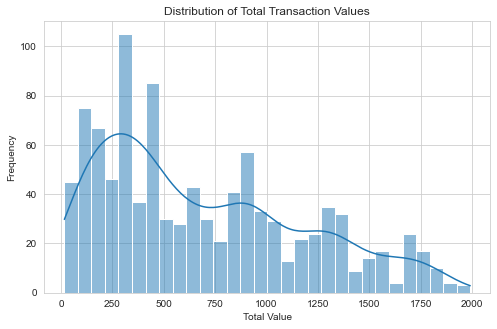

In [14]:
# 1. Distribution of transaction values
plt.figure(figsize=(8, 5))
sns.histplot(transactions_df['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Total Transaction Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

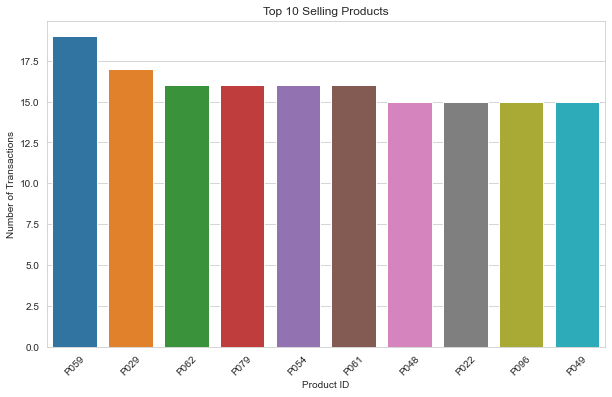

In [15]:
# 2. Top selling products
top_products = transactions_df['ProductID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


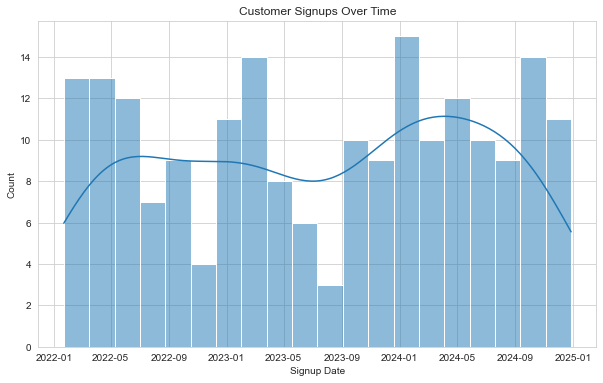

In [16]:
# 3. Customer signups over time
plt.figure(figsize=(10, 6))
sns.histplot(customers_df['SignupDate'], bins=20, kde=True)
plt.title('Customer Signups Over Time')
plt.xlabel('Signup Date')
plt.ylabel('Count')
plt.show()

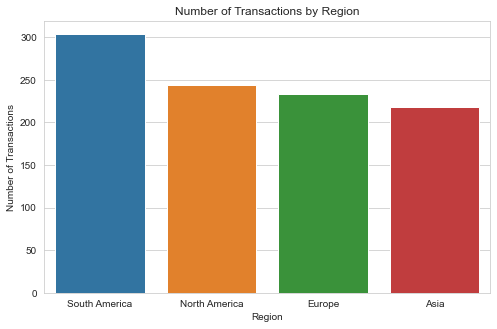

In [17]:
# 4. Transactions by region
merged_df = transactions_df.merge(customers_df, on='CustomerID')
region_counts = merged_df['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.show()

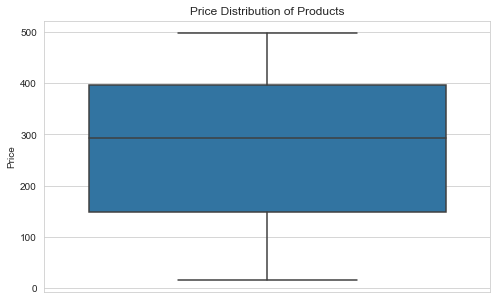

In [18]:
# 5. Price distribution of products
plt.figure(figsize=(8, 5))
sns.boxplot(y=products_df['Price'])
plt.title('Price Distribution of Products')
plt.ylabel('Price')
plt.show()

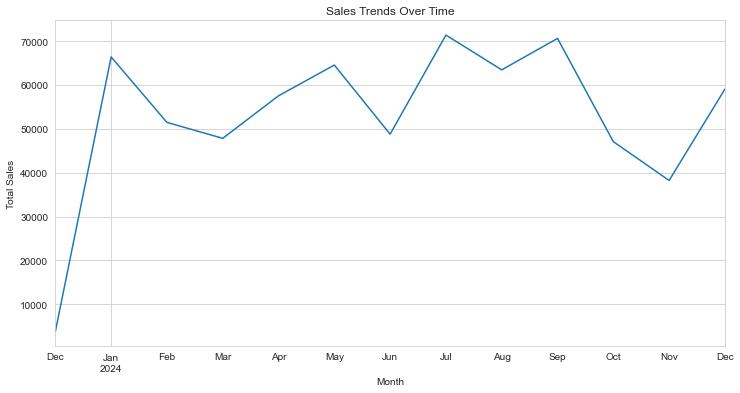

In [20]:
# 6. Sales trends over time
plt.figure(figsize=(12, 6))
transactions_df.set_index('TransactionDate')['TotalValue'].resample('M').sum().plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

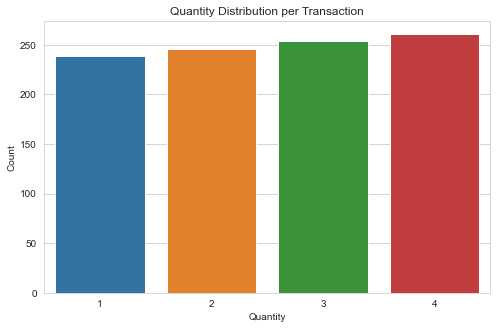

In [21]:
# 7. Quantity distribution per transaction
plt.figure(figsize=(8, 5))
sns.countplot(x='Quantity', data=transactions_df)
plt.title('Quantity Distribution per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

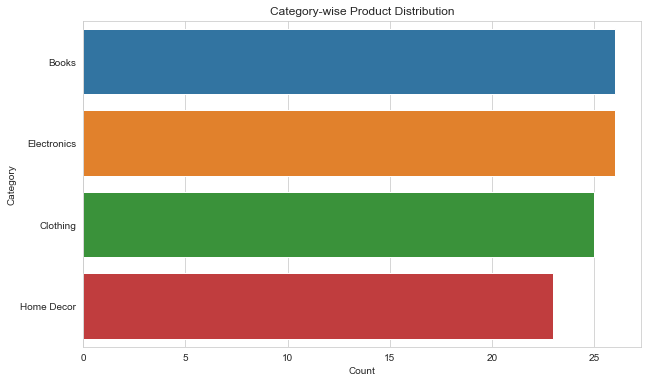

In [22]:
# 8. Category-wise product distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=products_df, order=products_df['Category'].value_counts().index)
plt.title('Category-wise Product Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()
